In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("house_prices.csv")

In [4]:
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={"price (in rupees)": "price", "carpet area": "squarefootage"}, inplace=True)


In [5]:
print(df.dtypes)

index                  int64
title                 object
description           object
amount(in rupees)     object
price                float64
location              object
squarefootage         object
status                object
floor                 object
transaction           object
furnishing            object
facing                object
overlooking           object
society               object
bathroom              object
balcony               object
car parking           object
ownership             object
super area            object
dimensions           float64
plot area            float64
dtype: object


In [6]:
df["price"] = df["price"].astype(str).str.replace(r"[^\d.]", "", regex=True)
df["squarefootage"] = df["squarefootage"].astype(str).str.replace(r"[^\d.]", "", regex=True)


In [7]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["squarefootage"] = pd.to_numeric(df["squarefootage"], errors="coerce")


In [8]:
df = df.dropna(subset=["price", "squarefootage"])

In [9]:
print(df[["squarefootage", "price"]].describe())
print(f"Number of valid rows: {len(df)}")


       squarefootage         price
count   93631.000000  9.363100e+04
mean     1212.795634  8.204824e+03
std      3220.372972  3.313686e+04
min         1.000000  0.000000e+00
25%       776.000000  4.600000e+03
50%      1050.000000  6.324000e+03
75%      1500.000000  1.050000e+04
max    709222.000000  6.700000e+06
Number of valid rows: 93631


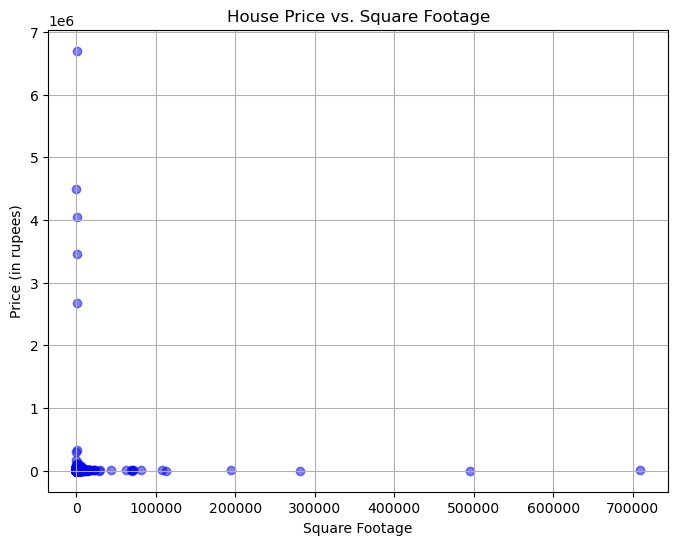

In [10]:
if len(df) > 0:
    plt.figure(figsize=(8, 6))
    plt.scatter(df["squarefootage"], df["price"], alpha=0.5, color='blue')
    plt.xlabel("Square Footage")
    plt.ylabel("Price (in rupees)")
    plt.title("House Price vs. Square Footage")
    plt.grid(True)
    plt.show()
else:
    print(" No valid data to plot. Check your dataset!")
